# Advent of Code 2024

## Day 01

In [1]:
from pathlib import Path
import winsound

def load_file(file_name: str) -> str:
    with Path(f"./{file_name}").open() as file:
        payload = file.read()
    return payload

def finished_signal(duration: int = 1000, freq: int = 1000):
    winsound.Beep(freq, duration)

In [2]:
# 1st half
import numpy as np

payload = load_file("d01.txt")

left = []
right = []

for pair in payload.split("\n"):
    l, row = pair.split("   ")
    left.append(int(l))
    right.append(int(row))

left = np.array(left)
right = np.array(right)

left = np.sort(left)
right = np.sort(right)

total_distance = np.absolute(left - right).sum()
total_distance

2378066

In [3]:
# 2nd half
from collections import Counter

payload = load_file("d01.txt")

left = []
right = []

for pair in payload.split("\n"):
    l, row = pair.split("   ")
    left.append(int(l))
    right.append(int(row))

right = Counter(right)

similarties = []
for l in left:
    row = right[l]
    s = row * l
    similarties.append(s)

sum(similarties)

18934359

## Day 02

In [4]:
# 1st half
payload = load_file("d02.txt")

def check_diffs(diffs: np.array) -> bool:
    absolute = np.absolute(diffs)
    d_min = np.min(absolute)
    d_max = np.max(absolute)

    if d_min >= 1 and d_max <= 3:
        return True
    else:
        return False

def check_signs(signs: np.array) -> bool:
    pos = np.ones(signs.shape, dtype=np.int8)
    neg = pos * -1  
    if (signs == pos).all() or (signs == neg).all():
        return True
    else:
        return False
    
def check_safety(nums) -> bool:
    diffs = np.diff(nums)
    signs = np.sign(diffs)

    check1 = check_diffs(diffs)
    check2 = check_signs(signs)
    return all([check1, check2])

reports = []
for report in payload.split("\n"):
    nums = map(int, report.split())
    nums = np.array(list(nums))
   
    safe = check_safety(nums)
    reports.append(safe)
    
n_safe_report = sum(map(int, reports))
n_safe_report

564

In [5]:
# 2nd half
payload = load_file("d02.txt")

def check_dampener(nums) -> bool:
    
    for ind in range(len(nums)): 
        lev = nums.copy()
        lev = np.delete(lev, ind)

        safe = check_safety(lev)
        if safe:
            break
    
    return safe


reports = []
for report in payload.split("\n"):
    nums = map(int, report.split())
    nums = np.array(list(nums))
   
    safe = check_safety(nums)
    if not safe:
        safe = check_dampener(nums)

    reports.append(safe)
    
n_safe_report = sum(map(int, reports))
n_safe_report

604

## Day 03

In [6]:
# 1st half
import re 
# build and test pattern at https://regex101.com/

payload = load_file("d03.txt")

mul_pattern = r"mul\(\d+\,\d+\)"
mul_matches = re.findall(mul_pattern, payload)

num_pattern = r"\d+"
num_matches = [re.findall(num_pattern, mul) for mul in mul_matches]

products = []
for pair in num_matches:
    a, b = int(pair[0]), int(pair[1])
    products.append(a * b)

sum(products)

188116424

In [7]:
# 2nd half
pattern = r"(mul\(\d+\,\d+\)|do\(\)|don't\(\))"
instructions = re.findall(pattern, payload)

def update_enable(instr: str) -> bool:
    if instr == "do()":
        return True
    else:
        return False
  
# enable at start
enable = True
products = []

for instr in instructions:
    if instr.startswith("d"):
        enable = update_enable(instr=instr)
    elif enable:
        pair = re.findall(num_pattern, instr)
        a, b = int(pair[0]), int(pair[1])
        products.append(a * b)
    else:
        continue

sum(products)

104245808

## Day 04

In [ ]:
# 1st half
# find all occurences of XMAS
# horizontal, vertical, diagonal, backwards
from itertools import product

# directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
directions_dict = list(product([-1, 0, 1], repeat=2))
directions_dict = [d for d in directions_dict if d != (0, 0)]

payload = load_file("./d04.txt")
payload = payload.split("\n")

SIZE = len(payload) # assume n by n

s = 0
for y in range(SIZE):
    for x in range(SIZE):
        for dy, dx in directions_dict:
            if 0 <= y + 3 * dy < SIZE and 0 <= x + 3 * dx < SIZE:
                if payload[y][x] == "X" \
                and payload[y+dy][x+dx] == "M" \
                and payload[y + 2 * dy][x + 2 * dx] == 'A' \
                and payload[y + 3 * dy][x + 3 * dx] == 'S':
                    s += 1

print("Result", s)

Result 2514


## Day 05

In [9]:
# 1st half
from collections import defaultdict
payload = load_file("./d05.txt")

def extract_rules_orders(payload: str) -> tuple[dict[int, list[int]], list[int]]:
    rules = defaultdict(list)
    orders = []
    r_sep = "|"
    o_sep = ","

    for line in payload.split():
        if r_sep in line:
            a, b = line.split(r_sep)
            a, b = int(a), int(b)
            rules[a].append(b)
        elif o_sep in line:
            order = line.split(o_sep)
            order = list(map(int, order))
            orders.append(order)
        else: # skips empty lines
            continue

    rules = dict(rules)
    return rules, orders

rules, orders = extract_rules_orders(payload)

def check_page_index(page: int, order: list[int], rule: list[int]) -> bool:
    page_ind = order.index(page)
    other_ind = [page_ind < order.index(r) for r in rule if r in order]
    return all(other_ind)

valid_orders = {}
for ord_ind, order in enumerate(orders):
    all_valid = []
    for page in order:
        # determine if each individual page is in valid position
        rule = rules.get(page)
        if rule is not None:
            other_ind = check_page_index(page, order, rule)
            all_valid.append(other_ind)
        else:
            all_valid.append(True)
    
    # determine if all pages are in valid positions
    valid_orders[ord_ind] = all(all_valid)


def get_middle_item(any_list: list[int]) -> int:
    return any_list[len(any_list)//2]

s = 0
for ind, valid in valid_orders.items():
    if valid:
        order = orders[ind]
        middle = get_middle_item(order)
        s += middle

s

6267

In [10]:
# 2nd half

def extract_rule_pairs(payload: str) -> list[tuple[int, int]]:
    r_rules = []
    r_sep = "|"

    for line in payload.split():
        if r_sep in line:
            a, b = line.split(r_sep)
            a, b = int(a), int(b)
            r_rules.append((a, b))

    return r_rules

def fix_ordering(rules: list[tuple[int, int]], order: list[int]) -> list[int]:
    rule_dict = defaultdict(list)

    for before, after in rules:
        if before in order and after in order:
            rule_dict[after].append(before)
    # we're reversing the rules for a page with rule 
    # then using len() gives us how many pages must come before
    # thus giving the position were the page in question goes 
    # if no rule for a page is found the defaultdict return empty list
    order.sort(key=lambda page: len(rule_dict[page]))
    return order


r_rules = extract_rule_pairs(payload)

s = 0
for ind, valid in valid_orders.items():
    if not valid:
        order = orders[ind]
        fixed_order = fix_ordering(r_rules, order)
        middle = get_middle_item(fixed_order)
        s += middle

s

5184

## Day 06

In [ ]:
# 1st half
payload = load_file("./d06.txt").split()

def make_grid(payload: list[str]) -> dict[tuple[int, int], str]:
    size = len(payload)
    grid = {}

    # assume n by n 
    for x in range(size):
        for y in range(size):
            grid[(x, y)] = payload[y][x]

    return grid


def find_start_coords(symbol: str, grid) ->tuple[int, int]:
    for coords, field in grid.items():
        if field == symbol:
            break

    return coords

def within_bounds(coords, bounds) -> bool:
    if bounds[0] <= coords[0] < bounds[1] \
        and bounds[0] <= coords[1] < bounds[1]:
        return True
    else: 
        return False

directions_dict = {
    "^": (0, -1),
    ">": (1, 0),
    "v": (0, 1),
    "<": (-1, 0),
}

def change_direction(curr_dir: str) -> str:
    next_direction = {
        "^": ">",
        ">": "v",
        "v": "<",
        "<": "^",
    }
    return next_direction[curr_dir]



SIZE = len(payload)
floor = "."
crate = "#"
bounds = (0, SIZE)
grid = make_grid(payload)

curr_dir = "^"
curr_coords = find_start_coords(curr_dir, grid)
distinct_positions = [curr_coords]

while True:
    direction = directions_dict[curr_dir]
    next_coords = (
        curr_coords[0] + direction[0],
        curr_coords[1] + direction[1],
    )

    
    if not within_bounds(next_coords, bounds):
        break
    
    if grid[next_coords] == crate:
        # curr_dir = next(directions)
        curr_dir = change_direction(curr_dir)
        continue

    if grid[next_coords] != crate:
        distinct_positions.append(next_coords)
        curr_coords = next_coords


len(set(distinct_positions))

5095

In [12]:
payload = load_file("./d06.txt").split()
obstacle = "O"

def is_infinite_loop(
        grid: dict[tuple[int, int], str],
        start_coords: tuple[int, int],
        start_dir: str,
        bounds: tuple[int, int],
    ) -> bool:

    curr_coords = start_coords
    curr_dir = start_dir
    visited_states = set()

    while True:
        state = (curr_coords, curr_dir)

        if state in visited_states:
            return True
        visited_states.add(state)

        direction = directions_dict[curr_dir]
        next_coords = (
            curr_coords[0] + direction[0],
            curr_coords[1] + direction[1],
        )

        if not within_bounds(next_coords, bounds):
            return False

        if grid[next_coords] in (crate, obstacle):
            curr_dir = change_direction(curr_dir)
        else:
            curr_coords = next_coords 

def find_valid_obstacle_positions(payload: str) -> list:
    size = len(payload)
    bounds = (0, size)
    grid = make_grid(payload)
    start_dir = "^"
    start_coords = find_start_coords(start_dir, grid)
    valid_positions = []

    for x in range(size):
        for y in range(size):
            pos = (x, y)

            if grid[pos] in (start_dir, crate):
                continue

            grid[pos] = obstacle

            if is_infinite_loop(grid, start_coords, start_dir, bounds):
                valid_positions.append(pos)
            
            grid[pos] = floor # reset grid


    return valid_positions
    
                
val_pos_obst = find_valid_obstacle_positions(payload)
len(val_pos_obst)

1933

## Day 07

In [ ]:
# 1st half
# operators + * -> try all combinations
# find all left that are possible from right with operators 
from math import prod
from itertools import product 
OPERATORS = ("+", "*")

OPS_FUNC = {
    "+": sum,
    "*": prod,
}


def permutator(operators: tuple = OPERATORS, repeat: int = 2):
    return list(product(operators, repeat=repeat))


def check_possible(left: int, right: list[int]) -> bool:
    n_ops = len(right) - 1
    poss_operators = permutator(repeat=n_ops)

    for ops in poss_operators:
        new_left = right[0]

        for i in range(n_ops):
            func = OPS_FUNC[ops[i]]
            new_left = func([new_left, right[i+1]])

            if new_left > left:
                continue   
        
        if new_left == left:
            return True

    return new_left == left


def process_step1(payload: str) -> list[int]:

    result = []
    for line in payload.split("\n"):
        left, right = line.split(":")
        left = int(left)
        right = list(map(int, right.split()))
        if check_possible(left, right):
            result.append(left)

    return result


payload = load_file("./d07.txt")
result = process_step1(payload)
sum(result) # 2941973819040

2941973819040

In [ ]:
# 2nd half

def concat(array: list[int]) -> int:
    return int("".join(map(str, array)))

OPERATORS = ("+", "*", "||")

OPS_FUNC = {
    "+": sum,
    "*": prod,
    "||": concat,
}

payload = load_file("./d07.txt")
result = process_step1(payload)
finished_signal()
sum(result) # 249943041417600

249943041417600

## Day 08

In [ ]:
from collections import defaultdict
from itertools import combinations

payload = load_file("./d08.txt")
grid = payload.split("\n")
SIZE = len(grid)
BOUNDS = (0, SIZE)
EMPTY = "."

def within_bounds(point, bounds=BOUNDS):
    return bounds[0] <= point[0] < bounds[1] and bounds[0] <= point[1] < bounds[1]

def compute_antinodes(a, b):
    ax, ay = a
    bx, by = b
    
    c = ax - (bx - ax), ay - (by - ay)
    d = bx + (bx - ax), by + (by - ay)

    if within_bounds(c):
        yield c
    if within_bounds(d):
        yield d


def get_antenna_locations(grid):
    size = len(grid)
    all_locs = defaultdict(list)
    for r in range(size):
        for c in range(size):
            if grid[r][c] != EMPTY:
                all_locs[grid[r][c]].append((r, c))
    
    return all_locs

def get_antinode_locations(antenna_locations):
    antinodes = set()
    for locs in antenna_locations.values():
        # get all two-pair combinations between antennas
        for a, b in combinations(locs, r=2):
            for antinode in compute_antinodes(a, b):
                antinodes.add(antinode)
    
    return antinodes


antenna_locations = get_antenna_locations(grid)
antinode_locations = get_antinode_locations(antenna_locations)

print(len(antinode_locations))

426


In [ ]:

def compute_resonators(a, b):
    ax, ay = a
    bx, by = b
    dx, dy = bx - ax, by - ay
    
    resonators = []
    i = 0
    while True:
        r = ax - dx * i, ay - dy * i
        if within_bounds(r):
            resonators.append(r)
        else:
            break
        i += 1
    
    i = 0
    while True:
        r = bx + dx * i, by + dy * i 
        if within_bounds(r):
            resonators.append(r)
        else:
            break
        i += 1

    return resonators

def get_resonator_locations(antenna_locations):
    resonators = set()
    for freq in antenna_locations:
        locs = antenna_locations[freq]
        for a, b in combinations(locs, r=2):
            for resonator in compute_resonators(a, b):
                resonators.add(resonator)

    return resonators


antenna_locations = get_antenna_locations(grid)
resonator_locations = get_resonator_locations(antenna_locations)


print(len(resonator_locations))

1359


## Day 09

In [15]:
def make_filesystem(diskmap: str) -> list:
    blocks = []
    is_file = True
    id = 0

    # bits are alternative file, non-file
    for bit in map(int, diskmap):
        if is_file:
            blocks += [id] * bit
            id += 1
        else:
            blocks += [None] * bit
        is_file = not is_file

    return blocks

def compress(block):
    first_free = 0
    while block[first_free] != None:
        first_free += 1

    ind = len(block) - 1
    while block[ind] == None:
        ind -= 1

    while ind > first_free:
        block[first_free] = block[ind]
        block[ind] = None
        
        while block[ind] == None:
            ind -= 1

        while block[first_free] != None:
            first_free += 1

    return block

def checksum(block) -> int:
    check = 0
    for ind, bit in enumerate(block):
        if bit != None:
            check += ind * bit
    
    return check

payload = load_file("./d09.txt")
filesystem = make_filesystem(payload)
compressed = compress(filesystem)
check = checksum(compressed)
print(check)

6262891638328


In [ ]:
# 2nd half
payload = load_file("./d09.txt")
n = len(payload)
SIZE = [0] * n
LOC = [0] * n

def make_filesystem(diskmap):
    global LOC, SIZE # write to global scope

    blocks = []

    is_file = True
    id = 0
    for x in diskmap:
        x = int(x)
        if is_file:
            LOC[id] = len(blocks)
            SIZE[id] = x
            blocks += [id] * x
            id += 1
        else:
            blocks += [None] * x
        is_file = not is_file
    
    return blocks

def compress(block):
    curr = 0
    while SIZE[curr] > 0:
        curr += 1
    curr -= 1

    for to_move in range(curr, -1, -1):
        # find first free space
        free_space = 0
        first_free = 0
        while first_free < LOC[to_move] and free_space < SIZE[to_move]:
            first_free += free_space
            free_space = 0
            while block[first_free] != None:
                first_free += 1
            while first_free + free_space < len(block) and block[first_free + free_space] == None:
                free_space += 1
        
        if first_free >= LOC[to_move]:
            continue
        
        # move file by swapping block values
        for idx in range(first_free, first_free + SIZE[to_move]):
            block[idx] = to_move
        for idx in range(LOC[to_move], LOC[to_move] + SIZE[to_move]):
            block[idx] = None
        
    return block

filesystem = make_filesystem(payload)
compressed = compress(filesystem)
check = checksum(compressed)
print(check)

6287317016845


## Day 12

In [17]:
# 1st half
grid = load_file("./d12.txt").split("\n")

size = len(grid)
BOUNDS = (0, size)

DIRECTIONS = [[1, 0], [0, 1], [-1, 0], [0, -1]]

def within_bounds(point, bounds=BOUNDS):
    return bounds[0] <= point[0] < bounds[1] and bounds[0] <= point[1] < bounds[1] 


def find_plots(grid): 
    size = len(grid)
    seen = set()
    plots = []

    for row in range(size):
        for col in range(size):
            if (row, col) in seen:
                continue

            stack = [(row, col)]
            plots.append([grid[row][col], []])

            while len(stack) > 0:
                c_row, c_col = stack.pop()
                if (c_row, c_col) in seen:
                    continue
                if not within_bounds((c_row, c_col)):
                    continue
                if grid[c_row][c_col] != grid[row][col]:
                    continue
                seen.add((c_row, c_col))

                plots[-1][1].append((c_row, c_col))
                for d_row, d_col in DIRECTIONS:
                    r, c = c_row + d_row, c_col + d_col
                    stack.append((r, c))
    
    return plots

def count_free(row, col, grid):
    ans = 0
    for d_row, d_col in DIRECTIONS:
        r, c = row + d_row, col + d_col
        if not within_bounds((r, c)):
            ans += 1
        elif grid[r][c] != grid[row][col]:
            ans += 1
    return ans

def perim(plot):
    ans = 0
    for r, c in plot:
        ans += count_free(r, c, grid)
    return ans

plots = find_plots(grid)

ans = 0
for c, plot in plots:
    ans += perim(plot) * len(plot)

print(ans)

1377008


## Day 13

In [4]:
# 1st half
import re # https://regex101.com/

payload = load_file("./d13.txt").split("\n\n")


def solve_machine(ax, ay, bx, by, px, py):
    """
    two equations: 
     I: ax * a + ay * b = px
    II: bx * a + by * b = py
    
    we want to solve for a and b:
    b = (ay * px - ax * py) / (ay * bx - ax * by)
    a = (px - b * bx) / ax
    
    check for integer solution
    """
    b, brem = divmod(ay * px - ax * py, ay * bx - ax * by)
    a, arem = divmod(px - b * bx, ax)

    if arem != 0 or brem != 0:
        return 0, 0
    else:
        return a, b
    

def process_step1(payload):

    num_pattern = r"\d+"
    solution = []

    for machine in payload:
        numbers = re.findall(num_pattern, machine)
        numbers = map(int, numbers)
        a, b = solve_machine(*numbers)
        # print(a, b)
        solution.append(a * 3 + b)

    return solution

solution = process_step1(payload)
sum(solution)

37680

In [3]:
# 2nd half
payload = load_file("./d13.txt").split("\n\n")

BASE = 10000000000000

def process_step2(payload):

    num_pattern = r"\d+"
    solution = []

    for machine in payload:
        numbers = re.findall(num_pattern, machine)
        numbers = list(map(int, numbers))
        numbers[-1] += BASE
        numbers[-2] += BASE
        a, b = solve_machine(*numbers)
        # print(a, b)
        solution.append(a * 3 + b)

    return solution

solution = process_step2(payload)
sum(solution)

87550094242995

## Day 14

In [103]:
from dataclasses import dataclass
import numpy as np
from math import prod

# sample input
# X_SIZE = 11
# Y_SIZE = 7

# real input
X_SIZE = 101
Y_SIZE = 103

@dataclass
class Robot:
    pos: tuple[int, int]
    vec: tuple[int, int]

    def move(self, steps: int):
        x = self.pos[0]
        y = self.pos[1]

        v_x = self.vec[0]
        v_y = self.vec[1]

        # plu size and modulus size makes "wrap around"
        x_new = (x + v_x * steps + X_SIZE) % X_SIZE
        y_new = (y + v_y * steps + Y_SIZE) % Y_SIZE

        self.pos = (x_new, y_new)

    def __str__(self):
        return f"Robot: pos{self.pos}, vec{self.vec}"


def initialize_robots(instructions: str) -> list[Robot]:
    robots = []
    for line in instructions.split("\n"):
        pos, vec = line.split(" ")
        pos = pos.replace("p=", "")
        vec = vec.replace("v=", "")
        pos = tuple(map(int, pos.split(",")))
        vec = tuple(map(int, vec.split(",")))
        robots.append(Robot(pos, vec))

    return robots


N_STEPS = 100
def move_all_robots(robots: list[Robot], steps: int = N_STEPS) -> list[tuple[int, int]]:
    final_pos = []
    for robot in robots:
        robot.move(steps)
        final_pos.append(robot.pos)

    return final_pos


def construct_field(final_pos: list[tuple[int, int]], x_size: int = X_SIZE, y_size: int = Y_SIZE) -> list[int]:
    field = np.zeros((y_size, x_size), dtype=np.int32)
    for pos in final_pos:
        r, c = pos
        field[c][r] += 1

    return field

def count_quadrants(field: np.ndarray, x_size: int = X_SIZE, y_size: int = Y_SIZE) -> tuple[int, int, int, int]:
    
    field_no_middle = np.delete(field, x_size // 2, axis=1)
    field_no_middle = np.delete(field_no_middle, y_size // 2, axis=0)

    new_x_size = field_no_middle.shape[1]
    new_y_size = field_no_middle.shape[0]

    q0 = field_no_middle[0:new_y_size // 2, 0:new_x_size // 2].sum()
    q1 = field_no_middle[0:new_y_size // 2, new_x_size // 2:].sum()
    q2 = field_no_middle[new_y_size // 2:, 0:new_x_size // 2].sum()
    q3 = field_no_middle[new_y_size // 2:, new_x_size // 2:].sum()

    return q0, q1, q2, q3 

instructions = load_file("./d14.txt")
robots = initialize_robots(instructions)
final_pos = move_all_robots(robots)
field = construct_field(final_pos)
qs = count_quadrants(field)
print("Result: ", prod(qs))

Result:  218619324


step = 6446


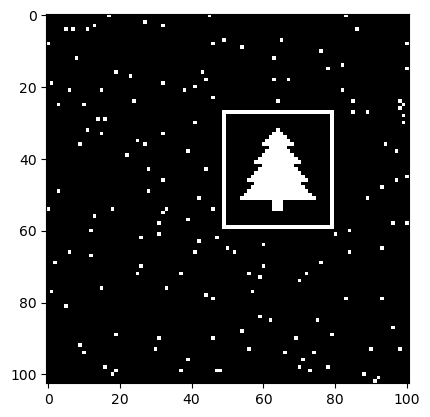

In [122]:
import matplotlib.pyplot as plt

# real input
X_SIZE = 101
Y_SIZE = 103

instructions = load_file("./d14.txt")

init_robots = initialize_robots(instructions)
n_robots = len(init_robots)

for step in range(1, 10_000):
    init_robots = initialize_robots(instructions)
    final_pos = move_all_robots(init_robots, steps=step)
    field = construct_field(final_pos)
    distinct = np.where(field != 0, 1, 0)
    if distinct.sum() == n_robots:
        print(f"{step = }")
        break


plt.imshow(field, cmap="gray");

## Day 19

In [22]:
# 1st half
from functools import lru_cache

def get_components_products(payload):
    components, products = payload.split("\n\n")
    components = components.split(", ")
    products = products.split()

    return components, products

def process_step1(payload: str) ->  list[str]:
    components, products = get_components_products(payload)

    # cannot hash a list of components for caching as func parameter
    # so we have to scope this function inside another
    @lru_cache(None)
    def can_build_product(product: str) -> bool:
        if len(product) == 0:
            return True
        
        for component in components:
            if product.startswith(component):
                remaining_product = product[len(component):]
                
                if can_build_product(remaining_product):
                    return True
        
        return False

    possible_products = []
    for p in products:
        if can_build_product(p):
            possible_products.append(p)

    return possible_products


payload = load_file("./d19.txt")
possible_products = process_step1(payload)
len(possible_products)

344

In [26]:
# 2nd half

def process_step2(payload: str):
    components, products = get_components_products(payload)

    @lru_cache(None)
    def count_possible(product: str) -> int:
        if len(product) == 0:
            return 1

        count = 0
        for component in components:
            if product.startswith(component):
                remaining_product = product[len(component):]
                count += count_possible(remaining_product)

        return count
    
    possible_combs = dict()
    for p in products:
        if count_possible(p):
            possible_combs[p] = count_possible(p)

    return possible_combs

payload = load_file("./d19.txt")
possible_combs = process_step2(payload)
sum(possible_combs.values())

996172272010026